# **Parkinson's disease detection using XGBoost and SVM - ML Project**

***Objective*** - Prediction of Parkinson's disease detection of patient based on the valuable parametres in given dataset.

**Data Source** - In this project we are using data from the UC Irvine Open Data archives. This data is in .CSV format and it can be manipulated by pulling the data into specific format with the help of pandas Dataframe.

**Necessary Library Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import SVC

**Load Dataset**

In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Data description** -

*   This dataset is composed of a range of biomedical measurements by 31 people and  with Parkinson's disease.
*   Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals . 


*   The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

**Matrix column information** -
* name - ASCII subject name and recording number
*  MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA      - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Shape of Data**

In [ ]:
df.shape

(195, 24)

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

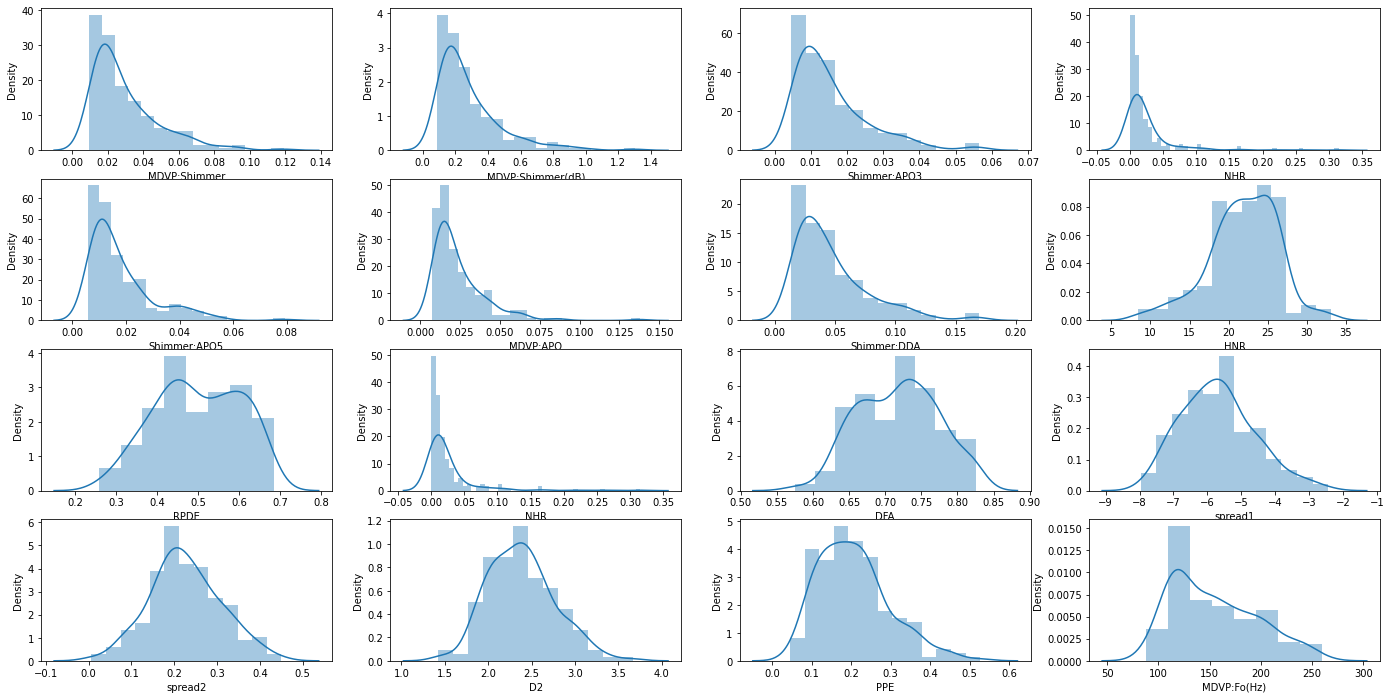

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(24,12)) 
sns.distplot(df['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(df['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(df['Shimmer:APQ3'],ax=ax[0,2])
sns.distplot(df['NHR'],ax=ax[0,3]) 
sns.distplot(df['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(df['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(df['Shimmer:DDA'],ax=ax[1,2]) 
sns.distplot(df['HNR'],ax=ax[1,3])
sns.distplot(df['RPDE'],ax=ax[2,0])
sns.distplot(df['NHR'],ax=ax[2,1]) 
sns.distplot(df['DFA'],ax=ax[2,2]) 
sns.distplot(df['spread1'],ax=ax[2,3]) 
sns.distplot(df['spread2'],ax=ax[3,0]) 
sns.distplot(df['D2'],ax=ax[3,1])
sns.distplot(df['PPE'],ax=ax[3,2])
sns.distplot(df['MDVP:Fo(Hz)'],ax=ax[3,3])

**Target Variable and Feature Variable**

In [ ]:
features = df.loc[:, df.columns != 'status'].values[:, 1:]

target = df.loc[:, 'status'].values

**Import MinMaxScaler class from sklearn.preprocessing and normalise feature**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1, 1))
#Feature Normalisation
X=scaler.fit_transform(features)
y=target

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Train the model with XGBoost**

In [ ]:
#Train the model
model1 = XGBClassifier()
model1.fit(X_train,y_train)

XGBClassifier()

**Prediction**

In [ ]:
# Predict the model

from sklearn.metrics import accuracy_score

y1_prediction = model1.predict(X_test)

print("Accuracy Score is", accuracy_score(y_test, y1_prediction) * 100)

Accuracy Score is 97.43589743589743


**Model Evaluation based on confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(

    confusion_matrix(y_test, y1_prediction),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,11,1
True Parkinsons,0,27


**Explaination**

In this Python machine learning project, we learned to detect the presence of Parkinson’s Disease in individuals using various factors. We used an XGBClassifier for this and made use of the sklearn library to prepare the dataset. This gives us an accuracy of 96.66%, which is great.

**Train the model on Support Vector Machine**

In [ ]:
#Support Vector Machine
model2 = SVC()
model2.fit(X_train,y_train)

SVC()

**Predict the model**

In [ ]:
y2_prediction = model2.predict(X_test)

print("Accuracy Score is", accuracy_score(y_test, y2_prediction) * 100)

Accuracy Score is 92.3076923076923


**Model Evaluation based on Confusion matrix**

In [ ]:
pd.DataFrame(

    confusion_matrix(y_test, y2_prediction),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,9,3
True Parkinsons,0,27


# Conclusion

Parkinson’s disease affects the CNS of the brain and has yet no treatment unless it’s detected early. Late detection leads to no treatment and loss of life. Thus its early detection is significant. For early detection of the disease, we utilized machine learning algorithms such as XGBoost and Support Vector Machine.As we see the acuracy with XGBoost is 94.87179487179486 while the accuracy with Support Vector Machine is 89.74358974358975 .So, we checked our Parkinson disease data and find out XGBoost is the best Algorithm to predict the onset of the disease which will enable early treatment and save a life.